In [9]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [25]:
def get_torque_max(shear_stress, thickness, diameter):
    t = thickness/12
    d = diameter/12
    return (math.pi/16) * shear_stress * (d**4 - (d - t)**4)/d

def get_tube_planar_mass(thickness, diameter, density):
    return (math.pi * (diameter/2)**2 - (math.pi * (diameter/2 - thickness)**2)) * density

https://www.engineeringtoolbox.com/torsion-shafts-d_947.html

shear stress : lb-ft^2 

twisting moment : lb-ft 

diameter : inches 

thickness : inches 

In [29]:
materials = { # all stresses are in lb-ft^2, density lb/in^3
    'al7075' : {
        "material_name": 'al7075',
        "shear_stress": 6912000,
        "density": .102,
    },
    'al6061' : {
        "material_name": 'al6061',
        "shear_stress": 4320000,
        "density": .0975,
    },
    'Ti6Al4v' : {
        "material_name": 'Ti6Al4v',
        "shear_stress": 11491200,
        "density": .163,

    },
    '4340_annealed' : {
        "material_name": '4340_annealed',
        "shear_stress": 9072000,
        "density": .284,
    },
   '4340_normalized' : {
        "material_name": '4340_normalized',
        "shear_stress": 15840000,
        "density": .284,
    }
}

Data table; all values are referenced in spreadsheet file

In [60]:
def diameter_thickness_plot(material, zaxis):
    ax = plt.axes(projection='3d')

    zdata = material[zaxis]
    xdata = material["diameters"]
    ydata = material["thicknesses"]
    
    ax.set_xlabel('Tube Diameter')
    ax.set_ylabel('Tube Thickness')
    ax.set_zlabel(zaxis)
    
    ax.set_ylim(0,.05)

    ax.scatter3D(xdata, ydata, zdata, c=zdata)

    plt.title(material["material_name"])
    plt.show()



<class 'dict'>


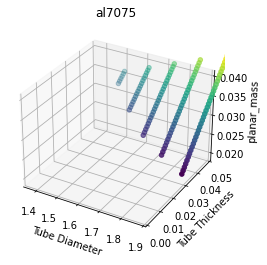

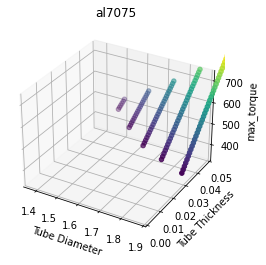

<class 'dict'>


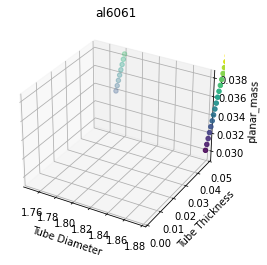

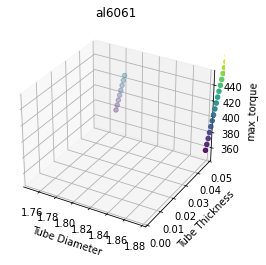

<class 'dict'>


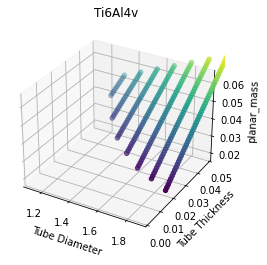

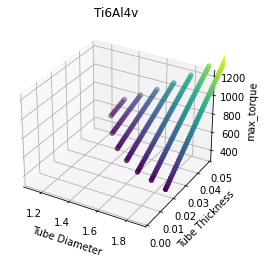

<class 'dict'>


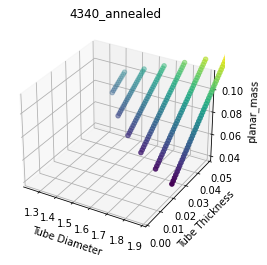

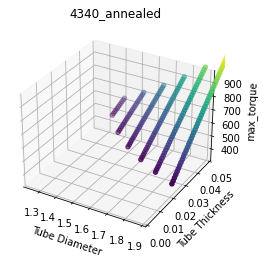

<class 'dict'>


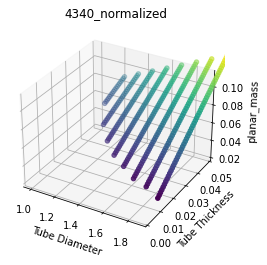

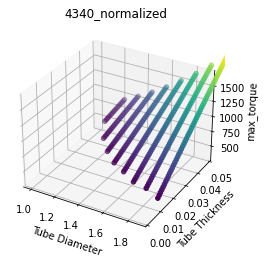

In [61]:
for material_name, material in materials.items():
    print(type(material))
    shear_stress = material["shear_stress"]
    
    material["diameters"] = []
    material["thicknesses"] = []
    material["max_torque"] = []
    material["planar_mass"] = []
    
    for diameter in np.arange(.625,2,.125):
        for thickness in np.arange(.001,.07,.001):
            
            max_torque = get_torque_max(shear_stress, thickness, diameter)
            planar_mass = get_tube_planar_mass(thickness, diameter, material["density"])
            
            if max_torque > 350:
                material["diameters"].append(diameter)
                material["thicknesses"].append(thickness)
                material["max_torque"].append(max_torque)
                material["planar_mass"].append(planar_mass)
            
    diameter_thickness_plot(material, "planar_mass")
    diameter_thickness_plot(material, "max_torque")
            
 
